In [1]:
import pandas as pd #загружаем pandas, чтобы работать с таблицей
import matplotlib.pyplot as plt #загружаем библиотеку, чтобы работать с диаграммами
import numpy as np #ещё одна библиотека для вычислений (одна из самых популярных)
from scipy.interpolate import make_interp_spline #из специальной библиотеки загружаем инструмент интерполяции для создания плавной кривой

In [2]:
df = pd.read_excel(r'Число браков в расчете на 1000 населения за год.xls', skiprows=2) #прямо из корня читаем таблицу excel, это гораздо удобнее, чем монтировать диск и забирать оттуда
df.rename(columns = {"Unnamed: 0":"Регион", "Unnamed: 1":"Население"}, inplace=True) #переименовываем колонки
df #смотрим, что получилось

,Регион,Население,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Российская Федерация,все население,8.9,8.6,7.1,7.5,7.4,7.3,5.9,6.3,...,8.4,8.5,9.2,8.5,8.5,8.4,7.9,6.7,7.1,6.1
1,Российская Федерация,городское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.3,8.6,8.6,8.5,8.5,7.2,7.6,6.5
2,Российская Федерация,сельское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,8.1,8.3,8.0,6.4,5.4,5.8,5.0
3,Центральный федеральный округ,все население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.2,8.1,8.8,8.0,8.2,8.3,8.0,6.7,7.2,6.1
4,Центральный федеральный округ,городское население,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.9,8.1,8.3,8.4,8.4,7.1,7.6,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Северо-Кавказский район,все население,9.2,9.1,7.4,8.0,8.0,8.0,6.1,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,Уральский район,все население,8.7,8.5,7.1,7.4,7.0,6.9,5.5,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,Западно-Сибирский район,все население,9.0,8.8,7.2,7.6,7.3,7.3,5.9,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,Восточно-Сибирский район,все население,8.7,8.4,6.8,7.0,6.8,6.8,5.1,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = df.loc[df['Население'] == 'все население'] #фильтруем по типу населения и создаем новый дата-фрейм
df2 = df2.loc[df2['Регион'] == 'Российская Федерация'] #фильтруем по региону, это бубут средние значения по РФ
df2 = df2.drop(['Регион','Население'], axis = 1) #удаляем лишние для работы с данными столбцы
df2 = df2.transpose() #транспонируем таблицу
df2.rename(columns = {0:"Разводы на 100 чел"}, inplace=True) #переименовываем единственный столбец
df2 #смотрим, что получилось

,Разводы на 100 чел
1990,8.9
1991,8.6
1992,7.1
1993,7.5
1994,7.4
1995,7.3
1996,5.9
1997,6.3
1998,5.8
1999,6.3


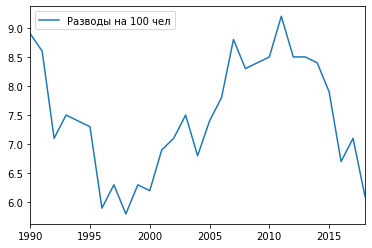

In [4]:
df2.plot.line() #создаем лнейный график по-умолчанию без всяких настроек
plt.show() #предварительно смотрим что получается

In [5]:
#если мы хотим играться с настройками, то нам нужно задать значения X и Y
x = df2.index.values #забираем значения годов из индекса в виде листа
x = pd.to_numeric(x) #так получилось, что они в формате текста, преобразовываем их в числа
x #нужно посмотреть, что же получилось

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [6]:
years = x.max()-x.min() #любопытства ради, вычисляю диапазон лет. вдруг пригодится
years #смотрю

28

In [7]:
y = df2["Разводы на 100 чел"].values  #забираем значения годов из индекса в виде листа, он уже в виде чисел
y #нужно посмотреть, что же получилось

array([8.9, 8.6, 7.1, 7.5, 7.4, 7.3, 5.9, 6.3, 5.8, 6.3, 6.2, 6.9, 7.1,
       7.5, 6.8, 7.4, 7.8, 8.8, 8.3, 8.4, 8.5, 9.2, 8.5, 8.5, 8.4, 7.9,
       6.7, 7.1, 6.1])

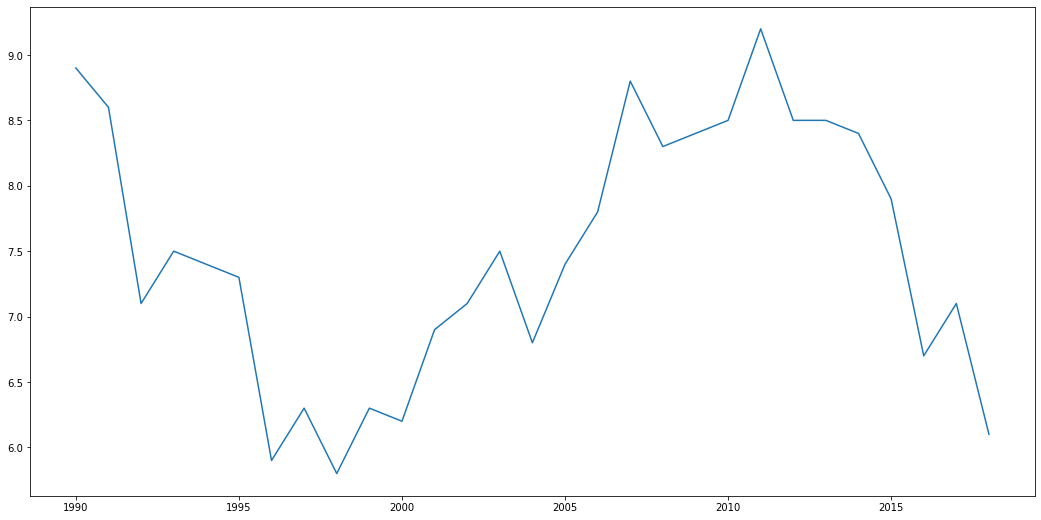

In [8]:
#хорошо бы проверить, как это выглядит
plt.figure(figsize=[18, 9]) #создаем фигуру и задем на глазок ей пропорции 18 на 9, кажется это дюймы, не спрашивайте почему
plt.plot(x,y) #создаем график по-умолчанию без всяких настроек, это будет линейный график
plt.show() #нужно посмотреть, что же получилось

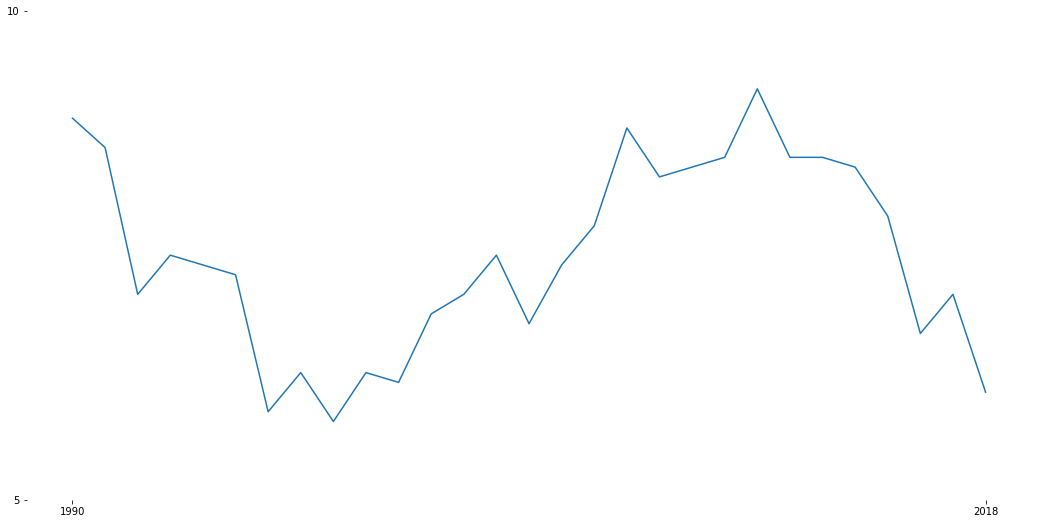

In [9]:
#давайте усложним себе задачу, настроим оси
plt.figure(figsize=[18, 9])
plt.plot(x,y)
plt.xticks(np.arange(x.min(), x.max()+1, years)) #здесь мы указываем с какого года по какой мы указываем метки и подписи меток оси X, а также их шаг. я настроил их так, чтобы видеть только первый год и последний
plt.yticks(np.arange(5, 11, 5)) #с осью Y поступаем аналогично

#далее идет блок удаления границ прямоугольника построения. есть более элегантный способ, но я оставлю этот, чтобы всегда можно было выключить или включить любую ось
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['bottom'].set_color('none')

plt.show() #нужно посмотреть, что же получилось

In [10]:
#я хочу сделать комплексную визуализацию. для этого нужна комбинация среднего значения по РФ и всех значений регионов
df3 = df.loc[df['Население'] == 'все население'] #фильтруем по типу населения и создаем новый дата-фрейм
df3 = df3.drop(["Население"], axis = 1) #удаляем уже ненужный столбец
df3_mask = df3['Регион'].str.contains('      ') #создаем массив логических вычислений по содержанию в названии региона 6 пробелов. не спрашивайте, откуда эти пробелы, но просто так ЕМИСС экспортит таблицы, нам удобно. Единственное, здесь в одном ряду оказываются автономии и регионы их содержащие. Тут нужен более тщательный фильтр. Подумаю об этом завтра. Для нашей визуализации это не существенно.
df3 = df3[df3_mask] #фильтруе дата-фрейм по маске логических вычислений
columns_names = df3.columns.values.tolist() #создаем лист наиманований столбцов
columns_names = columns_names[2:] #из изголовков забираем только годы, то есть начиная со второго столбца
df3 = pd.melt(df3, id_vars=['Регион'] , value_vars=columns_names, var_name='Годы', value_name='Браки на 1000 нас.') #создаём плоскую таблицу
df3 #смотрим, что получилось

,Регион,Годы,Браки на 1000 нас.
0,Белгородская область,1991,9.0
1,Брянская область,1991,9.1
2,Владимирская область,1991,7.8
3,Воронежская область,1991,8.8
4,Ивановская область,1991,7.7
...,...,...,...
2655,Амурская область,2018,7.2
2656,Магаданская область,2018,7.0
2657,Сахалинская область,2018,7.5
2658,Еврейская автономная область,2018,6.0


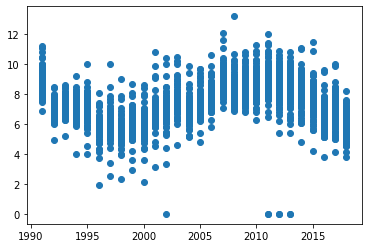

In [11]:
xs = df3['Годы'].values #забираем в виде листа годы для точечной диаграммы
xs = pd.to_numeric(xs) #так получилось, что они в формате текста, преобразовываем их в числа
ys = df3['Браки на 1000 нас.'].values #забираем в виде листа значения оси Y
plt.scatter(xs,ys) #предварительно смотрим что получилось

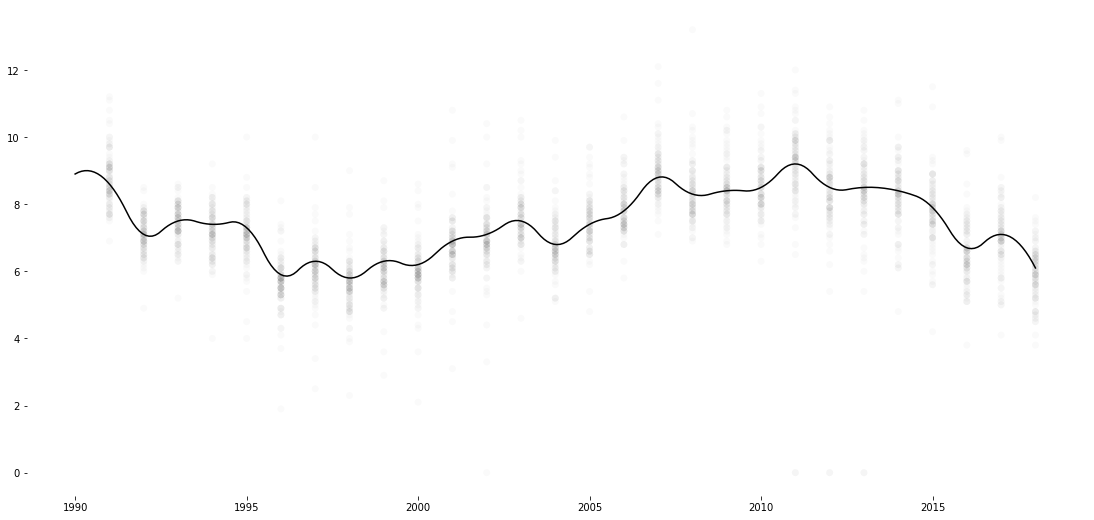

In [12]:
#вот теперь, самое интересное — интерполяция

xnew = np.linspace(x.min(), x.max(), 300) #создаем линейное распределение от минимального значения лет до максимального
spl = make_interp_spline(x, y, k=2) #интерполируем значения X и Y (это среднее по РФ)
y_smooth = spl(xnew) #забираем оттуда ряд значений Y с шагом новых значений xnew

plt.figure(figsize=[19, 9]) #это понятно? создаем фигуру с заданными пропорциями и размером в дюймах
plt.plot(xnew, y_smooth,c='black') #строим график но уже новыми, интерполированными данными, получается сглаженная кривая

plt.scatter(xs,ys,alpha=.02,s=50,c='black', edgecolors='none') #добавляем точечную диаграмму

#удаляем прямоугольник
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['bottom'].set_color('none')

#экспорт
plt.savefig("браки2.svg") #сохраняем для дальнейшего редактирования в векторном формате SVG
plt.savefig("браки2.png", dpi=600) #чтобы быстро делиться в тележке :) создаю растровый PNG, чтобы качество было хорошим указываю dpi побольше
plt.show() #смотрю